In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 00. Análisis EDA

En este apartado solo estudiaremos el CSV 'train.csv' ya que no hay que tratar los datos, solo estudiarlos.

In [2]:
data_train = pd.read_csv('/Users/emart/Documents/GitHub/mdata_dp3/data/train.csv')
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


Como podemos observar, tenemos 14 variables, 2 descriptivas del paciente ('age' y 'sex') y una que es la resultante a estudiar ('label'). Se detectan a primera vista valores negativos y carácteres como '?'. 

En un primer lugar, se va a explorar la naturaleza del dataset, haciendo énfasis en los valores que a primera vista parecen incoherentes.

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


Se entiende que los valores son númericos y que por lo tanto que existan carácteres '?' no tiene sentido. Por lo tanto se necesita realizar una transformación de esos valores a valores NaN (Not a Number) para poder seguir nuestro análisis.

In [4]:
columns_train = data_train.columns
for column in columns_train:
    """ Si el valor de la columna es '?', se reemplaza por None. Después, se convierte el tipo de dato a float. """
    data_train[column] = data_train[column].replace('?', None)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  685 non-null    object 
 4   chol      727 non-null    object 
 5   fbs       674 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   688 non-null    object 
 8   exang     688 non-null    object 
 9   oldpeak   683 non-null    object 
 10  slope     637 non-null    object 
 11  ca        483 non-null    object 
 12  thal      563 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


Antes de establecer los tipos de los datos de forma correcta vamos a buscar los valores negativos, que para algunas variables o todos, podría no tener ningún sentido.

In [5]:
for column in columns_train:
    """ Se convierten los valores de las columnas a float. """
    data_train[column] = data_train[column].astype(float)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  685 non-null    float64
 4   chol      727 non-null    float64
 5   fbs       674 non-null    float64
 6   restecg   732 non-null    float64
 7   thalach   688 non-null    float64
 8   exang     688 non-null    float64
 9   oldpeak   683 non-null    float64
 10  slope     637 non-null    float64
 11  ca        483 non-null    float64
 12  thal      563 non-null    float64
 13  label     732 non-null    float64
dtypes: float64(14)
memory usage: 80.2 KB


Estudiaremos por lo tanto los valores negativos:

In [7]:
print("Valores negativos por columna:")
print("--------------------------")
print((data_train < 0).sum())

Valores negativos por columna:
--------------------------
age           0
sex           0
cp            0
trestbps      0
chol         16
fbs           8
restecg       0
thalach       0
exang         0
oldpeak      10
slope       152
ca          230
thal        210
label         0
dtype: int64


Y de misma forma los valores NaN:

In [8]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_train.isnull().sum())

Valores nulos por columna:
--------------------------
age           0
sex           0
cp            0
trestbps     47
chol          5
fbs          58
restecg       0
thalach      44
exang        44
oldpeak      49
slope        95
ca          249
thal        169
label         0
dtype: int64


Podemos observar que para la cantidad de datos que tenemos (732) para algunas variables tenemos una cantidad bastante notable de NaN o de valores negativos para variables como 'ca'.

Los valores incorrectos podrían significar muchas cosas, como la falta de recopilación un dato o la falta de necesidad del dato. Por lo tanto, asumir que es uno u otro trae un riesgo que generará un peor resultado de nuestro modelo. Para ello, vamos a establecer unas hipótesis y las estudiaremos para ver si son viables. Para ello, primero vamos a estudiar las filas que tienen valores negativos, y vamos a buscar una relación entre ellas.

In [9]:
data_neg = data_train[(data_train < 0).any(axis=1)]
data_neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 1 to 727
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       234 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        233 non-null    float64
 12  thal      235 non-null    float64
 13  label     242 non-null    float64
dtypes: float64(14)
memory usage: 28.4 KB


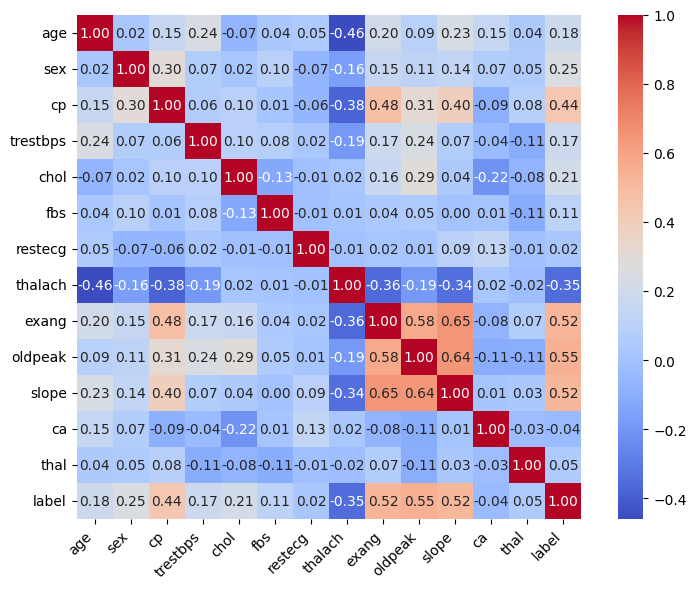

In [10]:
corr = data_neg.corr()

# Configurar la figura de matplotlib
plt.figure(figsize=(8, 6))

# Crear un mapa de calor
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajustar los ticks para más claridad y evitar cortes en los ticks de los ejes
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vamos a recorrer una a una las variables y vamos a estipular si tiene sentido que tenga un valor negativo o no:
- chol: No tiene lógica tener un valor de colesterol inferior a 0.
- fbs: No tiene lógica tener valores más allá del '0' y '1'.
- oldpeak: Podría tener sentido. Si siempre tenemos el mismo valor negativo pero los positivos no son iguales pierde la lógica.
- slope: Variable categórica [1; 3], no tiene lógica.
- ca: Variable categórica entre [0; 3], no tiene lógica.
- thal: Variable categórica entre [3, 6, 7], no tiene lógica.

In [11]:
data_train['oldpeak'].describe()

count    683.000000
mean       0.881259
std        1.112960
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.550000
max        6.200000
Name: oldpeak, dtype: float64

<Axes: >

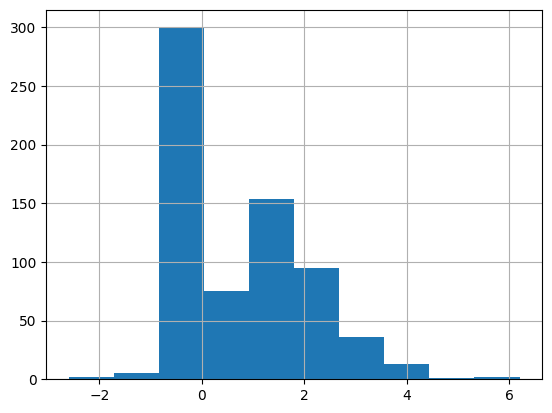

In [12]:
data_train['oldpeak'].hist()

Aunque tenemos muchos valores entre -1 y 0, podemos observar que podría ser coherente tratarlos como si tuvieran la posibilidad de ser negativos. El resto de valores seguimos lo que establecimos en el apartado anterior.

In [13]:
data_train['chol'] = data_train['chol'].apply(lambda x: None if x < 0 else x)
data_train['fbs'] = data_train['fbs'].apply(lambda x: None if x < 0 else x)
data_train['slope'] = data_train['slope'].apply(lambda x: None if x < 0 else x)
data_train['ca'] = data_train['ca'].apply(lambda x: None if x < 0 else x)
data_train['thal'] = data_train['thal'].apply(lambda x: None if x < 0 else x)

Comprobamos que solo 'oldpeak' tenga valores negativos. El resto son positivos o nulos.

In [14]:
print("Valores negativos por columna:")
print("--------------------------")
print((data_train < 0).sum())

Valores negativos por columna:
--------------------------
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     10
slope        0
ca           0
thal         0
label        0
dtype: int64


A continuación, en función de la explicación obtenida del enunciado, vamos a definir que variables son continuas y cuáles son categóricas:
- **Continuas**: age, trestbps, chol, thalach, oldpeak.
- **Categóricas**: sex, cp, fbs, restecg, exang, slope, ca, thal
- **Resultado**: label

Por lo tanto, observamos que no todas las variables cumplen con su naturaleza de dato. Procedemos entonces a estipular el tipo en cada una de ellas.

In [15]:
# Númericas - Continuas
data_train['age'] = data_train['age'].astype(int)
data_train['trestbps'] = data_train['trestbps'].astype(float)
data_train['chol'] = data_train['chol'].astype(float)
data_train['thalach'] = data_train['thalach'].astype(float)
data_train['oldpeak'] = data_train['oldpeak'].astype(float)

# Categóricas
data_train['sex'] = data_train['sex'].astype('category')
data_train['cp'] = data_train['cp'].astype('category')
data_train['fbs'] = data_train['fbs'].astype('category')
data_train['restecg'] = data_train['restecg'].astype('category')
data_train['exang'] = data_train['exang'].astype('category')
data_train['slope'] = data_train['slope'].astype('category')
data_train['ca'] = data_train['ca'].astype('category')
data_train['thal'] = data_train['thal'].astype('category')
data_train['label'] = data_train['label'].astype('category')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    int64   
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  685 non-null    float64 
 4   chol      711 non-null    float64 
 5   fbs       666 non-null    category
 6   restecg   732 non-null    category
 7   thalach   688 non-null    float64 
 8   exang     688 non-null    category
 9   oldpeak   683 non-null    float64 
 10  slope     485 non-null    category
 11  ca        253 non-null    category
 12  thal      353 non-null    category
 13  label     732 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 36.5 KB


Antes de tratar los nulos, estableciendo correctamente los tipos de datos, pasamos a hacer un estudio exhaustivo de las variables.

In [16]:
data_train.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,732.000000,732.0,732.0,685.000000,711.000000,666.0,732.0,688.000000,688.0,683.000000,485.0,253.0,353.0,732.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,4.0,3.0,5.0
top,NaN,1.0,4.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,2.0,0.0,7.0,0.0
freq,NaN,578.0,391.0,NaN,NaN,554.0,439.0,NaN,422.0,NaN,277.0,147.0,160.0,327.0
mean,53.364754,NaN,NaN,131.975182,199.956399,NaN,NaN,138.132267,NaN,0.881259,NaN,NaN,NaN,NaN
std,9.306868,NaN,NaN,19.203305,110.928639,NaN,NaN,25.963443,NaN,1.112960,NaN,NaN,NaN,NaN
min,28.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,120.000000,176.500000,NaN,NaN,120.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,NaN,NaN,NaN
75%,60.000000,NaN,NaN,140.000000,268.500000,NaN,NaN,158.250000,NaN,1.550000,NaN,NaN,NaN,NaN


A continuación vamos a estudiar los posibles outliers antes de establecer un modelo para rellenar los NaN.

In [17]:
threshold = len(data_train.columns) - 5
data_train = data_train.dropna(thresh=threshold)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       688 non-null    int64   
 1   sex       688 non-null    category
 2   cp        688 non-null    category
 3   trestbps  685 non-null    float64 
 4   chol      669 non-null    float64 
 5   fbs       622 non-null    category
 6   restecg   688 non-null    category
 7   thalach   688 non-null    float64 
 8   exang     688 non-null    category
 9   oldpeak   683 non-null    float64 
 10  slope     485 non-null    category
 11  ca        253 non-null    category
 12  thal      352 non-null    category
 13  label     688 non-null    category
dtypes: category(9), float64(4), int64(1)
memory usage: 39.7 KB


In [18]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_train.isnull().sum())

Valores nulos por columna:
--------------------------
age           0
sex           0
cp            0
trestbps      3
chol         19
fbs          66
restecg       0
thalach       0
exang         0
oldpeak       5
slope       203
ca          435
thal        336
label         0
dtype: int64


#### 01. Preparar dataset de train y test

In [19]:
data_test = pd.read_csv('/Users/emart/Documents/GitHub/mdata_dp3/data/test.csv')

columns_test = data_test.columns
for column in columns_test:
    """ Si el valor de la columna es '?', se reemplaza por None. Después, se convierte el tipo de dato a float. """
    data_test[column] = data_test[column].replace('?', None)
    data_test[column] = data_test[column].astype(float)

data_test['chol'] = data_test['chol'].apply(lambda x: None if x < 0 else x)
data_test['fbs'] = data_test['fbs'].apply(lambda x: None if x < 0 else x)
data_test['slope'] = data_test['slope'].apply(lambda x: None if x < 0 else x)
data_test['ca'] = data_test['ca'].apply(lambda x: None if x < 0 else x)
data_test['thal'] = data_test['thal'].apply(lambda x: None if x < 0 else x)

# Númericas - Continuas
data_test['age'] = data_test['age'].astype(int)
data_test['trestbps'] = data_test['trestbps'].astype(float)
data_test['chol'] = data_test['chol'].astype(float)
data_test['thalach'] = data_test['thalach'].astype(float)
data_test['oldpeak'] = data_test['oldpeak'].astype(float)

# Categóricas
data_test['sex'] = data_test['sex'].astype('category')
data_test['cp'] = data_test['cp'].astype('category')
data_test['fbs'] = data_test['fbs'].astype('category')
data_test['restecg'] = data_test['restecg'].astype('category')
data_test['exang'] = data_test['exang'].astype('category')
data_test['slope'] = data_test['slope'].astype('category')
data_test['ca'] = data_test['ca'].astype('category')
data_test['thal'] = data_test['thal'].astype('category')

# threshold = len(data_test.columns) - 5
# data_test = data_test.dropna(thresh=threshold)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       184 non-null    int64   
 1   sex       184 non-null    category
 2   cp        184 non-null    category
 3   trestbps  173 non-null    float64 
 4   chol      175 non-null    float64 
 5   fbs       161 non-null    category
 6   restecg   183 non-null    category
 7   thalach   174 non-null    float64 
 8   exang     174 non-null    category
 9   oldpeak   171 non-null    float64 
 10  slope     123 non-null    category
 11  ca        56 non-null     category
 12  thal      80 non-null     category
dtypes: category(8), float64(4), int64(1)
memory usage: 10.0 KB


In [20]:
data_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1.0,4.0,156.0,173.0,0.0,2.0,119.0,1.0,3.0,3.0,NaN,NaN
1,52,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,NaN,NaN,NaN
2,48,1.0,2.0,100.0,NaN,0.0,0.0,100.0,0.0,0.0,NaN,NaN,NaN
3,62,1.0,4.0,115.0,0.0,NaN,0.0,128.0,1.0,2.5,3.0,NaN,NaN
4,51,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0


In [21]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_test.isnull().sum())

Valores nulos por columna:
--------------------------
age           0
sex           0
cp            0
trestbps     11
chol          9
fbs          23
restecg       1
thalach      10
exang        10
oldpeak      13
slope        61
ca          128
thal        104
dtype: int64


#### 02. Tratamiento de outliers

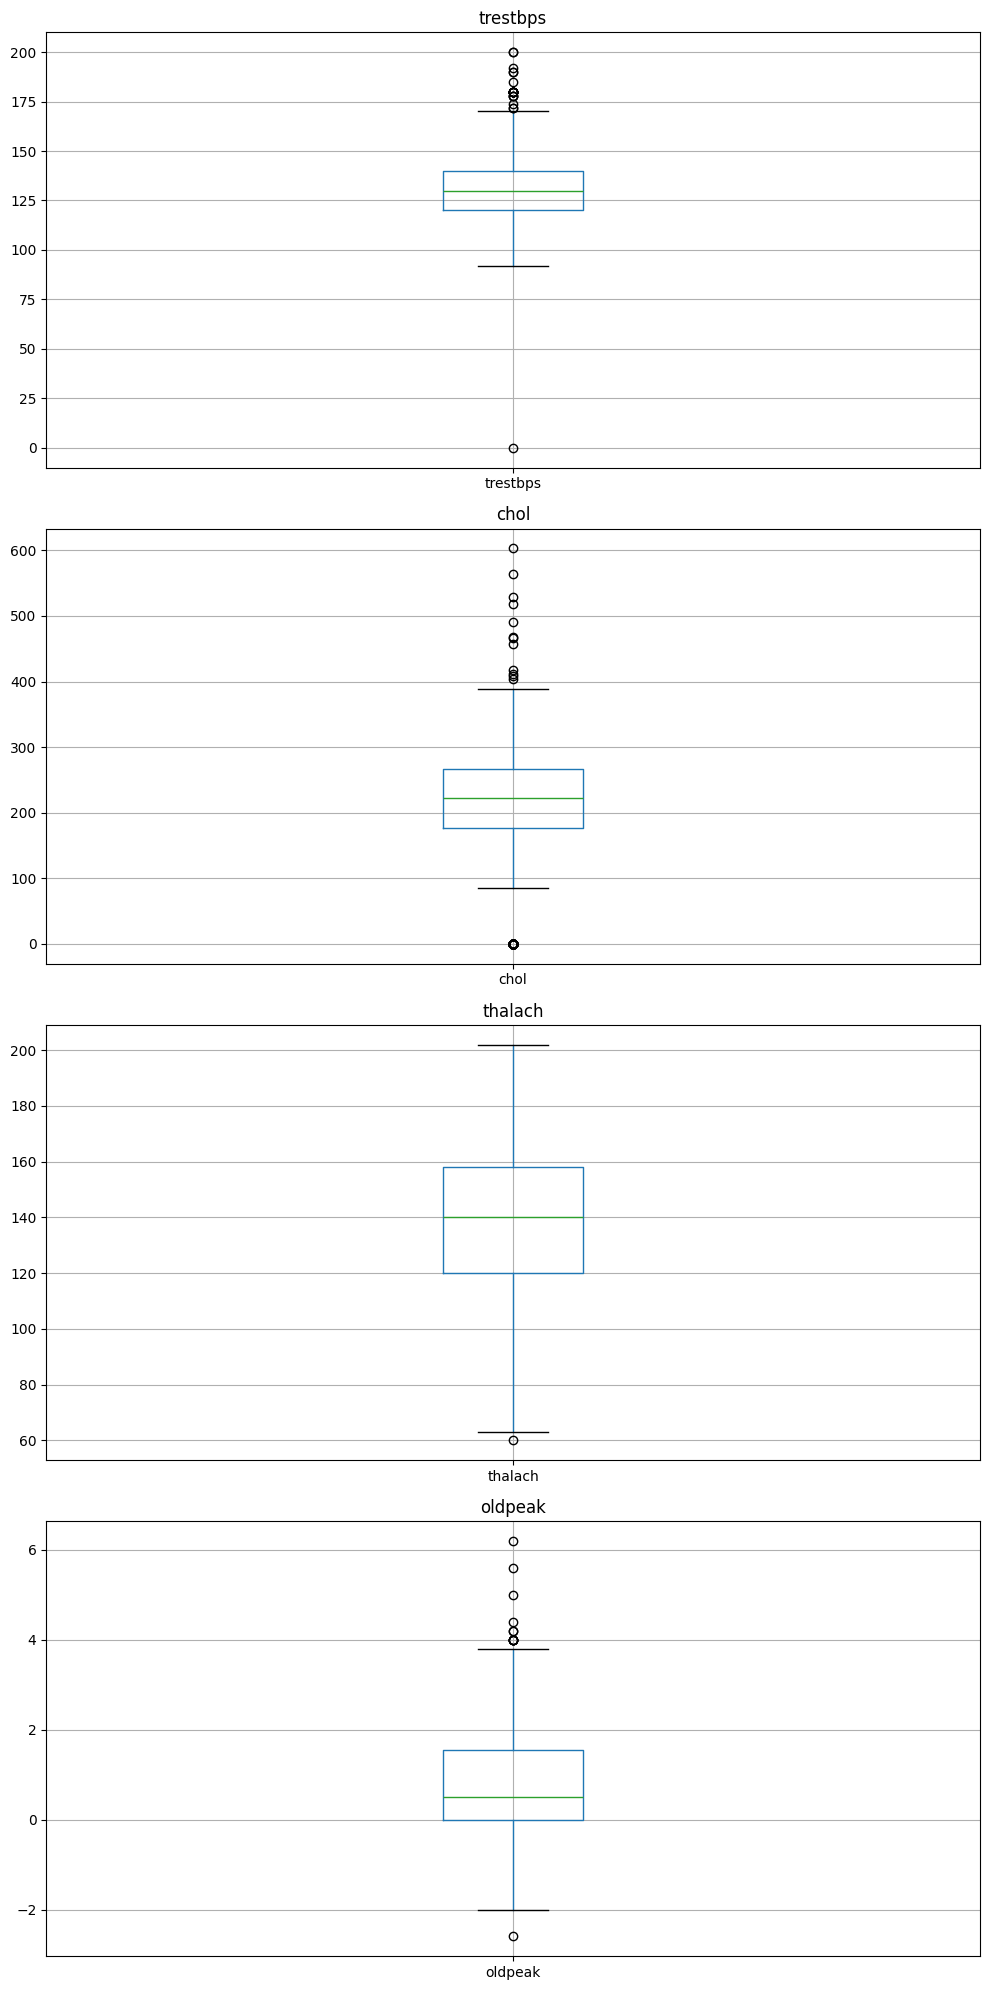

In [22]:
continuous_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Dibujar boxplots para cada columna continua
plt.figure(figsize=(10, 20))
for i, col in enumerate(continuous_cols):
    plt.subplot(len(continuous_cols), 1, i + 1)
    data_train.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

#### 03. KNN para rellenar los NaN de los valores númericos.

In [23]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_train.isnull().sum())

Valores nulos por columna:
--------------------------
age           0
sex           0
cp            0
trestbps      3
chol         19
fbs          66
restecg       0
thalach       0
exang         0
oldpeak       5
slope       203
ca          435
thal        336
label         0
dtype: int64


In [25]:
imputer = KNNImputer(n_neighbors=5)
scaler = StandardScaler()

num_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
X_numeric = data_train[num_cols]

X_imputed = imputer.fit_transform(X_numeric)
X_scaled = scaler.fit_transform(X_imputed)

X_imputed_df = pd.DataFrame(X_scaled, columns=num_cols)

In [26]:
data_train = data_train.reset_index()

In [27]:
data_train.loc[:, num_cols] = X_imputed_df
print("Valores nulos por columna:")
print("--------------------------")
print(data_train.isnull().sum())

Valores nulos por columna:
--------------------------
index         0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          66
restecg       0
thalach       0
exang         0
oldpeak       0
slope       203
ca          435
thal        336
label         0
dtype: int64


In [28]:
num_cols_test = ['trestbps', 'chol', 'thalach', 'oldpeak']
X_test = data_test[num_cols_test]

X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

data_test_imputed = pd.DataFrame(X_test_scaled, columns=X_test.columns)
data_test_imputed

,trestbps,chol,thalach,oldpeak
0,1.255563,-0.245381,-0.737429,1.912358
1,1.464396,-0.035746,1.035582,-0.793549
2,-1.668099,-0.547984,-1.469759,-0.793549
3,-0.884975,-1.822200,-0.390535,1.461374
4,-1.146017,-0.227151,-0.583254,-0.252368
...,...,...,...,...
179,3.552726,-0.017516,0.149077,1.010389
180,-1.146017,0.128317,1.613738,-0.667274
181,1.046730,0.110088,0.457426,-0.071974
182,1.986479,0.802794,0.804320,-0.613156


In [29]:
data_test = data_test.reset_index()

In [30]:
data_test.loc[:, num_cols_test] = data_test_imputed
data_test

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,57,1.0,4.0,1.255563,-0.245381,0.0,2.0,-0.737429,1.0,1.912358,3.0,NaN,NaN
1,1,52,1.0,2.0,1.464396,-0.035746,0.0,0.0,1.035582,0.0,-0.793549,NaN,NaN,NaN
2,2,48,1.0,2.0,-1.668099,-0.547984,0.0,0.0,-1.469759,0.0,-0.793549,NaN,NaN,NaN
3,3,62,1.0,4.0,-0.884975,-1.822200,NaN,0.0,-0.390535,1.0,1.461374,3.0,NaN,NaN
4,4,51,1.0,3.0,-1.146017,-0.227151,0.0,0.0,-0.583254,0.0,-0.252368,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,54,1.0,4.0,3.552726,-0.017516,0.0,0.0,0.149077,1.0,1.010389,2.0,NaN,NaN
180,180,55,1.0,2.0,-1.146017,0.128317,1.0,1.0,1.613738,0.0,-0.667274,NaN,NaN,NaN
181,181,67,1.0,3.0,1.046730,0.110088,0.0,2.0,0.457426,0.0,-0.071974,2.0,0.0,7.0
182,182,59,1.0,1.0,1.986479,0.802794,0.0,2.0,0.804320,0.0,-0.613156,2.0,0.0,7.0


In [31]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_test.isnull().sum())

Valores nulos por columna:
--------------------------
index         0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          23
restecg       1
thalach       0
exang        10
oldpeak       0
slope        61
ca          128
thal        104
dtype: int64


#### 04. Moda para los valores categóricos.

In [32]:
cat_columns = ['fbs', 'restecg', 'slope', 'ca', 'thal', 'exang']
# Asumiendo que df es tu DataFrame
for column in cat_columns:
    data_train[column].fillna(data_train[column].mode()[0], inplace=True)
    data_test[column].fillna(data_test[column].mode()[0], inplace=True)

/var/folders/tw/726rvgp92_d68x9l034bwvpm0000gn/T/ipykernel_18747/4189345473.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train[column].fillna(data_train[column].mode()[0], inplace=True)
/var/folders/tw/726rvgp92_d68x9l034bwvpm0000gn/T/ipykernel_18747/4189345473.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [33]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_test.isnull().sum())

Valores nulos por columna:
--------------------------
index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [34]:
print("Valores nulos por columna:")
print("--------------------------")
print(data_train.isnull().sum())

Valores nulos por columna:
--------------------------
index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


### 10. Entrenamiento del modelo

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']

# Inicializar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = rf_model.predict(data_test)

df = pd.DataFrame({'ID': range(len(y_pred)), 'label': y_pred})
df['label'] = df['label'].astype(int)
df.to_csv('result.csv', index=False)